In [2]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.decomposition as dec
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.model_selection import StratifiedKFold #, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score

In [3]:
data_path_train = os.path.join(os.getcwd(),'Data', 'PartA', '20ng_train.csv')
data_path_test = os.path.join(os.getcwd(), 'Data', 'PartA', '20ng_test.csv')
data_path_labels = os.path.join(os.getcwd(), 'Data', 'PartA', '20ng_labels.csv')

ng_train = pd.read_csv(data_path_train, delimiter = ',', header=[0], compression ='bz2')
X_train = ng_train.drop('class', axis = 1)
y_train = ng_train['class']

ng_test = pd.read_csv(data_path_test, delimiter = ',', header=[0], compression ='bz2')
X_test = ng_test.drop('class', axis = 1)
y_test = ng_test['class']

ng_labels = pd.read_csv(data_path_labels, delimiter = ',', compression ='bz2')

In [36]:
# 1.1
#X_train.head(50)
#X_train.describe()#.iloc[1].sort_values()
#X_train.info() # 5648 entries, 1000 features (word TF-IDF), 

#unique, counts = np.unique(y_train, return_counts=True)
#plt.bar(unique, counts)
#plt.title('Class Frequency')
#plt.xlabel('Class')
#plt.ylabel('Frequency')
#plt.show()

In [40]:
#1.2 Compare testing set with training set

#X_test.head(50)
X_test.describe()
#X_test.info() # 5648 entries, 1000 features (word TF-IDF), 

# repercussions?

,__,ability,able,ac,accept,access,according,account,act,action,...,world,worth,wouldn,write,written,wrong,wrote,year,years,yes
count,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,...,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000
mean,0.002292,0.002168,0.007335,0.002817,0.002701,0.004449,0.003012,0.001716,0.001886,0.001745,...,0.006194,0.003018,0.005356,0.003746,0.003812,0.007960,0.001970,0.006214,0.008706,0.009449
std,0.032391,0.021397,0.034312,0.032169,0.021777,0.032393,0.026133,0.022855,0.019504,0.018376,...,0.041170,0.026231,0.033441,0.028779,0.032836,0.039182,0.020613,0.037389,0.041551,0.043570
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.864159,0.469412,0.337561,0.620254,0.310053,0.504324,0.420903,0.632166,0.336667,0.387412,...,1.000000,0.490894,0.481298,0.434553,0.543384,0.470697,0.566179,0.537827,0.532047,0.590114


1.3 Why do you think it is useful to consider TF-IDF weights as opposed to just the frequency of times a word appears in a document as a feature?

In [24]:
#not_null_accept = X_train['accept'][X_train['accept']>0]
#sns.distplot(non_null_accept)
not_null_words = X_train.nonzero()
not_null_words
sns.distplot(not_null_words)

AttributeError: 'DataFrame' object has no attribute 'nonzero'

In [5]:
# 2.4
amis = []
ks = list(range(2,13))
for k in ks:
    kmeans = KMeans(n_clusters=k,random_state=1000, n_init=50).fit(X_train)
    y = kmeans.predict(X_train)
    amis.append(adjusted_mutual_info_score(y_train, y, average_method='max'))

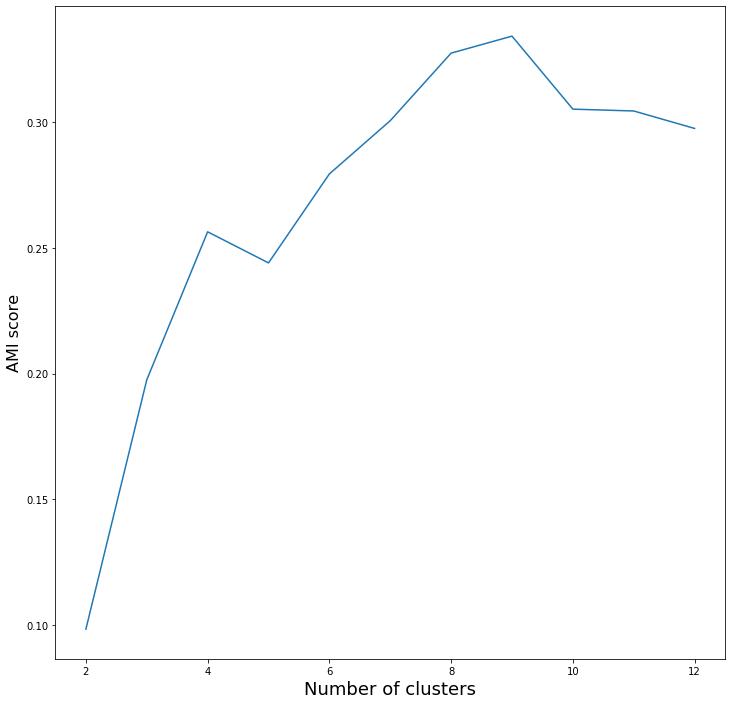

In [11]:
plt.figure(figsize=(12,12))
plt.plot(ks, amis)
plt.xlabel('Number of clusters', fontsize=18)
plt.ylabel('AMI score', fontsize=16)
plt.show()

In [12]:
kmeans4 = KMeans(n_clusters=4,random_state=1000, n_init=50).fit(X_train)
y4 = kmeans4.predict(X_train)

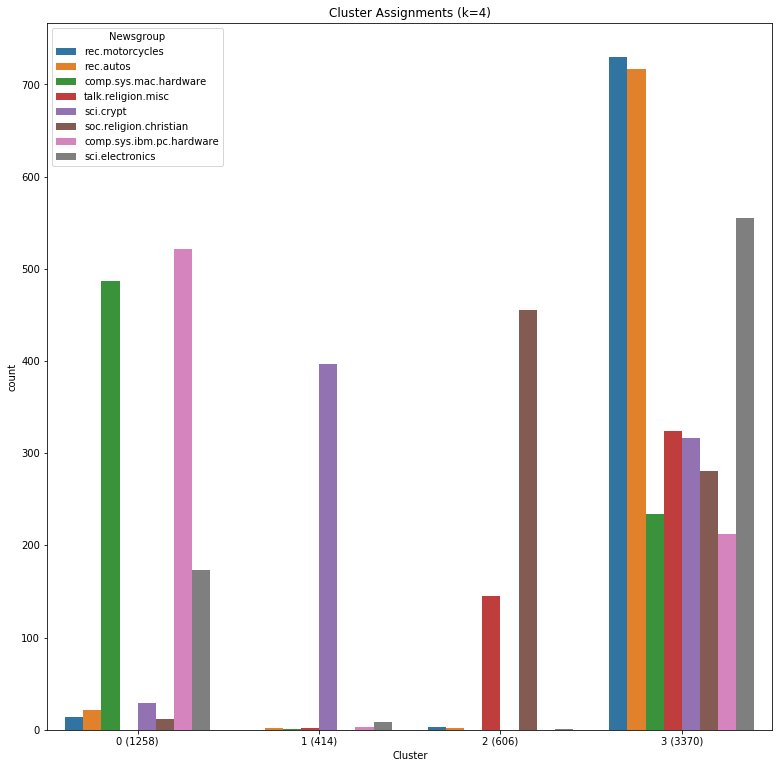

In [82]:
# 2.6
y_train_labels = list(map(lambda x: ng_labels.iloc[x].iloc[0], y_train))
assignments = pd.DataFrame(list(zip(y4, y_train_labels)), columns = ['Cluster', 'Newsgroup'])
plt.figure(figsize=(13,13))
ax = sns.countplot(data=assignments, x='Cluster', hue='Newsgroup')

ax.set_xticklabels(['0 (1258)','1 (414)','2 (606)','3 (3370)'])

plt.title('Cluster Assignments (k=4)')
plt.show()

In [32]:
# 3.2
dummy = DummyClassifier(strategy='stratified', random_state=0).fit(X_train, y_train)
predictions = dummy.predict(X_test)
f1_score(predictions, y_test, average='macro')

0.12827860458760965

In [33]:
# 3.4
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
f1s = []
for train_index_array, test_index_array in skf.split(X_train, y_train):
    train_instances = X_train.iloc[train_index_array]
    train_classes = y_train.iloc[train_index_array]
    
    test_instances = X_train.iloc[test_index_array]
    test_classes = y_train.iloc[test_index_array]
    
    lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state=0)
    lr.fit(X=train_instances, y=train_classes)
    predictions = lr.predict(test_instances)
    f1s.append(f1_score(predictions, test_classes, average='macro'))

In [34]:
print("Average F1 score: {}".format(np.mean(f1s)))
print("Standard deviation of F1 score: {}".format(np.std(f1s)))

Average F1 score: 0.6689909262264606
Standard deviation of F1 score: 0.016922045421971926


In [35]:
# 3.5 We will now optimise the Regularisation parameter C using cross-validation.
exponents = np.arange(-4, 5.5, 0.5)
Cs = list(map(lambda x: 10**x, exponents))

f1s_average_training = []
f1s_average_validation = []

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
for reg_param in Cs:
    f1s_training = []
    f1s_validation = []
    
    for train_index_array, test_index_array in skf.split(X_train, y_train):
        train_instances = X_train.iloc[train_index_array]
        train_classes = y_train.iloc[train_index_array]

        test_instances = X_train.iloc[test_index_array]
        test_classes = y_train.iloc[test_index_array]

        lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state=0, C=reg_param)
        lr.fit(X=train_instances, y=train_classes)
        
        predictions_training = lr.predict(train_instances)
        predictions_validation = lr.predict(test_instances)
        
        f1s_training.append(f1_score(predictions_training, train_classes, average='macro'))
        f1s_validation.append(f1_score(predictions_validation, test_classes, average='macro'))
    
    f1s_average_training.append(np.mean(f1s_training))
    f1s_average_validation.append(np.mean(f1s_validation))

/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, wa

/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, wa

/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages

/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages

/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages

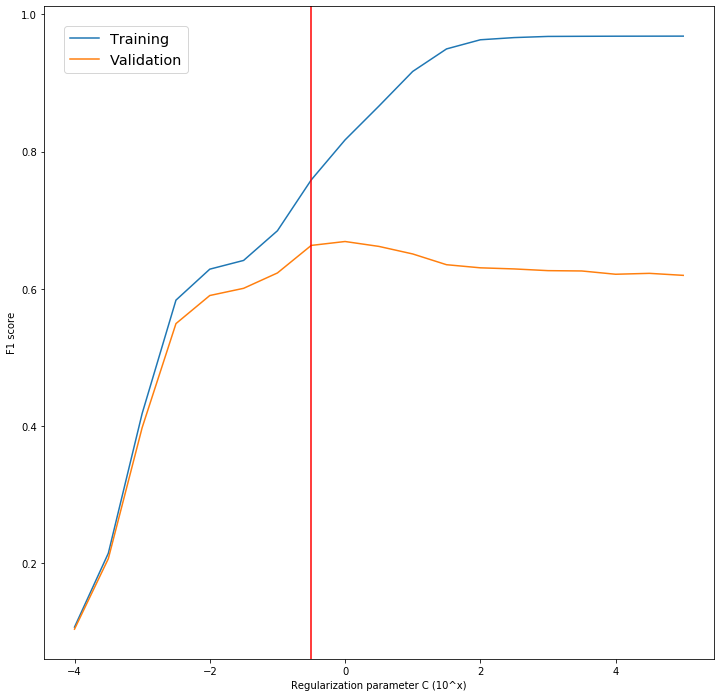

[0.0001, 0.00031622776601683794, 0.001, 0.0031622776601683794, 0.01, 0.03162277660168379, 0.1, 0.31622776601683794, 1.0, 3.1622776601683795, 10.0, 31.622776601683793, 100.0, 316.22776601683796, 1000.0, 3162.2776601683795, 10000.0, 31622.776601683792, 100000.0]
[0.10426652383342358, 0.20693715644729807, 0.3978221586555387, 0.549401889558099, 0.5903162727489074, 0.6007943890141922, 0.6231661213731127, 0.6632928459845525, 0.6689909262264606, 0.6618615893645126, 0.6508673013752745, 0.6351927624582812, 0.6306581456843349, 0.6290397926441794, 0.6265514299120727, 0.626067344281533, 0.6212917640148401, 0.622603362670217, 0.6196887999912131]


In [70]:
plt.figure(figsize=(12,12))
plt.plot(exponents, f1s_average_training, label='Training')
plt.plot(exponents, f1s_average_validation, label='Validation')
plt.legend(bbox_to_anchor=(0.03, 0.97), loc='upper left', borderaxespad=0., fontsize='x-large')
plt.axvline(x=-0.5, color='red')
plt.xlabel('Regularization parameter C (10^x)')
plt.ylabel('F1 score')
plt.show()
print(Cs)
print(f1s_average_validation)

In [75]:
# 3.7
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state=0, C=10 ** -0.5, max_iter=200)
lr.fit(X=X_train, y=y_train)
predictions = lr.predict(X_test)

F1-score on the test set: 0.6649874691737969


In [79]:
print("F1-score on the test set: {}".format(f1_score(predictions, y_test, average='macro')))

F1-score on the test set: 0.6649874691737969


In [5]:
# Question B
data_path_bristol_day_aligned = os.path.join(os.getcwd(),'Data', 'PartB', 'BristolAir_DayAligned.csv')
data_path_bristol_site_aligned = os.path.join(os.getcwd(),'Data', 'PartB', 'BristolAir_SiteAligned.csv')
data_path_bristol_exploratory = os.path.join(os.getcwd(),'Data', 'PartB', 'BristolAir_Exploratory.csv')

bristol_day_aligned = pd.read_csv(data_path_bristol_day_aligned, delimiter = ',', header=[0], parse_dates=[1], index_col=[0, 1], compression ='bz2')
bristol_site_aligned = pd.read_csv(data_path_bristol_site_aligned, delimiter = ',', header=[0, 1], parse_dates=[0], compression ='bz2')
bristol_exploratory = pd.read_csv(data_path_bristol_exploratory, delimiter = ',', header=[0], compression ='bz2')

4.1 Summarise the key features/observations in the data: describe the purpose
of each column and report (briefly) also on the dimensionality/ranges (ballpark figures
only, and how they compare across features) and number of sites, and identify anything
out of the ordinary/problematic: i.e. look out for missing data and negative values. Why
are the latter unreasonable in such a dataset? Hint: Refer to the documentation for how
to interpret the pollutant values.

In [16]:
# 4.1
#bristol_exploratory.describe()
#bristol_exploratory.info()
#bristol_exploratory.head(50)
#unique, counts = np.unique(bristol_exploratory['SiteID'], return_counts=True)
#print(counts)

In [29]:
# 4.2
SiteIDS = range(0, 18)
table = pd.DataFrame(columns = ['SiteID', 'Number of samples', 'Missing data', 'Negative entries'])
for SiteID in SiteIDS:
    site = bristol_exploratory.loc[bristol_exploratory['SiteID'] == SiteID]
    
    site_count = site.shape[0]
    missing = site_count - site.dropna().shape[0]
    negative = site_count - ((site['NOx']>=0) & (site['NO2']>=0) & (site['NO']>=0)).sum()
    table = table.append({'SiteID' :  SiteID, 'Number of samples' :  site_count, 'Missing data' :  missing/site_count, 'Negative entries' :  negative/site_count}, ignore_index=True)
    
table
#table.to_latex(index=False)

,SiteID,Number of samples,Missing data,Negative entries
0,0.0,6446.0,0.016134,0.016134
1,1.0,163111.0,0.062902,0.062902
2,2.0,62990.0,0.043483,0.043531
3,3.0,25464.0,0.773327,0.781103
4,4.0,74787.0,0.020685,0.020726
5,5.0,113952.0,0.088283,0.088283
6,6.0,142141.0,0.074440,0.074468
7,7.0,115162.0,0.041950,0.044728
8,8.0,43824.0,0.210570,0.210570
9,9.0,22071.0,0.053011,0.053011


In [34]:
# 4.2 COMBINED missing & negative
SiteIDS = range(0, 18)
table = pd.DataFrame(columns = ['SiteID', 'Samples', 'Problematic samples %'])
for SiteID in SiteIDS:
    site = bristol_exploratory.loc[bristol_exploratory['SiteID'] == SiteID];
    site_count = site.shape[0];
    site = site.dropna();
    neg_missing = site_count - ((site['NOx']>=0) & (site['NO2']>=0) & (site['NO']>=0)).sum()
    table = table.append({'SiteID' :  SiteID, 'Samples' :  site_count, 'Problematic samples %' :  neg_missing/site_count*100}, ignore_index=True)
    
table
#table.to_latex(index=False)

,SiteID,Samples,Problematic samples %
0,0.0,6446.0,1.613404
1,1.0,163111.0,6.290195
2,2.0,62990.0,4.353072
3,3.0,25464.0,78.110273
4,4.0,74787.0,2.072553
5,5.0,113952.0,8.828279
6,6.0,142141.0,7.446831
7,7.0,115162.0,4.472830
8,8.0,43824.0,21.056955
9,9.0,22071.0,5.301074


In [45]:
# 4.4
bristol_exploratory_clean = bristol_exploratory.query('SiteID != 3 & SiteID != 15')
bristol_exploratory_clean = bristol_exploratory_clean.drop('SiteID', axis=1)
bristol_exploratory_clean = bristol_exploratory_clean.drop('Loc.Lat', axis=1)
bristol_exploratory_clean = bristol_exploratory_clean.drop('Loc.Long', axis=1)
bristol_exploratory_clean.corr().to_latex(index=True)

'\\begin{tabular}{lrrr}\n\\toprule\n{} &       NOx &       NO2 &        NO \\\\\n\\midrule\nNOx &  1.000000 &  0.878016 &  0.988019 \\\\\nNO2 &  0.878016 &  1.000000 &  0.807853 \\\\\nNO  &  0.988019 &  0.807853 &  1.000000 \\\\\n\\bottomrule\n\\end{tabular}\n'

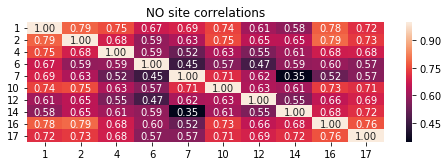

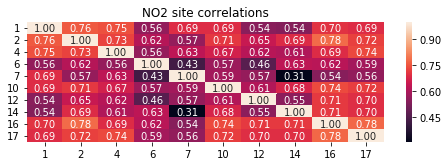

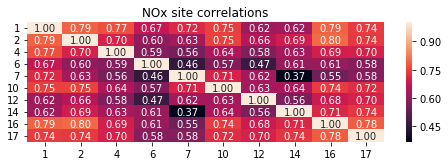

In [91]:
# 4.6
import mpctools.extensions.mplext as mpc
bristol_site_aligned_clean = bristol_site_aligned.drop('Date Time', axis=1)
bristol_site_aligned_clean_grouped = bristol_site_aligned_clean.groupby(axis=1, level=0)

for key, item in bristol_site_aligned_clean_grouped:
    plt.figure(figsize=(8, 2.2))
    plt.title(key + ' site correlations')
    mpc.plot_matrix(item.corr().values, mode='heatmap', show_val=True, labels=['1','2','4','6','7','10','12','14','16','17'])
    plt.show()

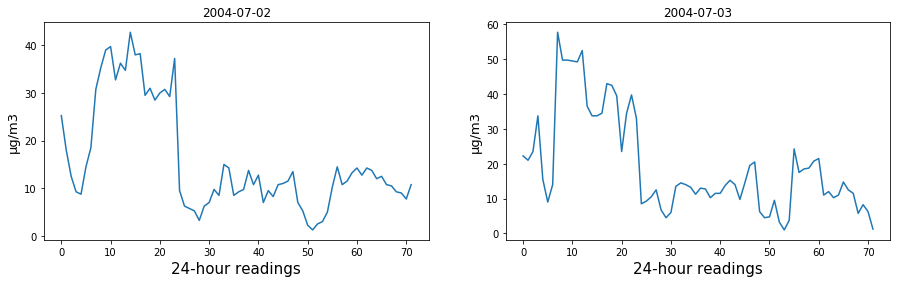

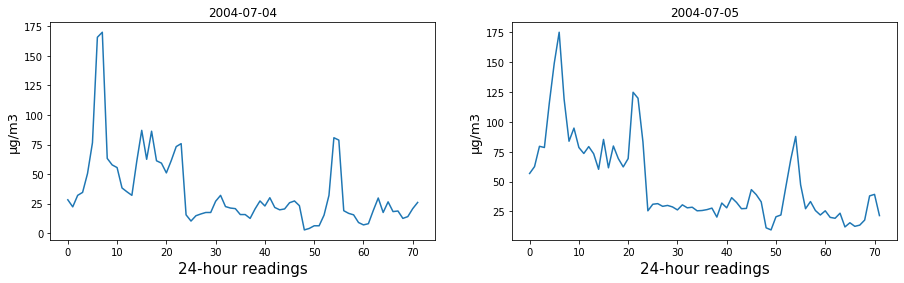

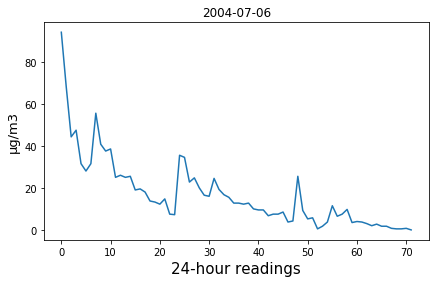

In [108]:
# 5.1
import matplotlib.gridspec as gridspec
x = range(0,72);
gs = gridspec.GridSpec(1, 5)

plt.figure(figsize=(40, 4))
ax = plt.subplot(gs[0, 0])
plt.plot(x, bristol_day_aligned.iloc[0])
plt.xlabel('24-hour readings', fontsize=15)
plt.ylabel('μg/m3', fontsize=13)
plt.title('2004-07-02')

ax = plt.subplot(gs[0, 1])
plt.plot(x, bristol_day_aligned.iloc[1])
plt.xlabel('24-hour readings', fontsize=15)
plt.ylabel('μg/m3', fontsize=13)
plt.title('2004-07-03')

plt.figure(figsize=(40, 4))
ax = plt.subplot(gs[0, 2])
plt.plot(x, bristol_day_aligned.iloc[2])
plt.xlabel('24-hour readings', fontsize=15)
plt.ylabel('μg/m3', fontsize=13)
plt.title('2004-07-04')

ax = plt.subplot(gs[0, 3])
plt.plot(x, bristol_day_aligned.iloc[3])
plt.xlabel('24-hour readings', fontsize=15)
plt.ylabel('μg/m3', fontsize=13)
plt.title('2004-07-05')

plt.figure(figsize=(40, 4))
ax = plt.subplot(gs[0, 4])
plt.plot(x, bristol_day_aligned.iloc[4])
plt.xlabel('24-hour readings', fontsize=15)
plt.ylabel('μg/m3', fontsize=13)
plt.title('2004-07-06')

plt.show()

In [132]:
site1_day_aligned = bristol_day_aligned.query('SiteID == 1');
pca = dec.PCA(n_components=72, random_state=0)
pca.fit(site1_day_aligned)

PCA(copy=True, iterated_power='auto', n_components=72, random_state=0,
    svd_solver='auto', tol=0.0, whiten=False)

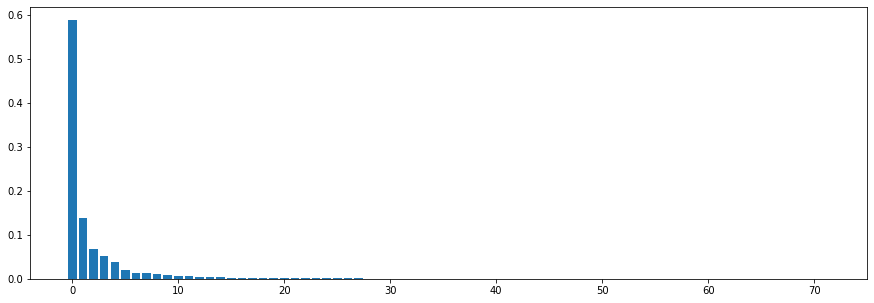

In [145]:
plt.figure(figsize=(15,5))
plt.bar(range(0,72), pca.explained_variance_ratio_)
plt.show()

In [146]:
covar_matrix.fit(x)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

NameError: name 'covar_matrix' is not defined

In [ ]:
# 6.1
